In [1]:
#Importing required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

from sklearn import preprocessing
from sklearn.model_selection import train_test_split #Package for splitting the data
from sklearn.preprocessing import LabelEncoder #Package for conversion of categorical to Numerical

from keras import layers

from keras.preprocessing.text import Tokenizer #Tokenization
from keras.preprocessing.sequence import pad_sequences #Add zeros or crop based on the length

from keras.utils.np_utils import to_categorical

from keras.constraints import maxnorm

from keras.models import Sequential #Sequential Neural Network
from keras.layers import Embedding, Conv1D, Dropout, MaxPooling1D, Flatten, Dense, LSTM, GlobalMaxPooling1D, SpatialDropout1D #For layers in Neural Network

# 1. Implement text classification on the review’s sentiment dataset using CNN model.

a. Include Embedding layer in the design of your models and report if that leads to a better performance

b. Plot loss of the model and report if you see any overfitting problem

c. What techniques you can apply to fix overfitting model


In [2]:
df=pd.read_csv(('train.tsv'), delimiter='\t') #Loading the file

In [3]:
df.head() #Top 5 rows

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
df.isna().sum() #Checking for any Null values

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [6]:
X = df['Phrase'] #Independent variable's

In [7]:
y = df['Sentiment']

In [8]:
X=X.apply(lambda x: x.lower()) #lower case
X=X.apply((lambda x: re.sub('[^a-zA-Z0-9\s]', '', x)))  #removing special characters

In [9]:
X

0         a series of escapades demonstrating the adage ...
1         a series of escapades demonstrating the adage ...
2                                                  a series
3                                                         a
4                                                    series
                                ...                        
156055                                             hearst s
156056                            forced avuncular chortles
156057                                   avuncular chortles
156058                                            avuncular
156059                                             chortles
Name: Phrase, Length: 156060, dtype: object

In [10]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ') #Tokenization
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X) #Padding 

In [11]:
embed_dim = 128
# lstm_out = 196 
num_classes = 5

In [12]:
X.shape[1]

45

## Include Embedding layer in the design of your models

In [13]:
model = Sequential() #Sequential Neural Network
model.add(Embedding(13734, embed_dim, input_length=X.shape[1])) #Embedding Layer with input shape as 45 Neurons
model.add(Dropout(0.2)) #drop out 20%
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2)) #drop out 20%
model.add(Dense(num_classes, activation='softmax')) #5 output Neurons as sentiment has 5 values[0,1,2,3,4]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
label_encoder = LabelEncoder() #Label Encoding on the Target columns
integer_encoded = label_encoder.fit_transform(y)
y = to_categorical(integer_encoded)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37) #Train test data 75-25%

In [16]:
accuracy_val = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test)) #Fitting the model

Epoch 1/5
229/229 [==============================] - 47s 206ms/step - loss: 1.1593 - accuracy: 0.5517 - val_loss: 1.0246 - val_accuracy: 0.5990
Epoch 2/5
229/229 [==============================] - 47s 207ms/step - loss: 0.9830 - accuracy: 0.6136 - val_loss: 0.9696 - val_accuracy: 0.6187
Epoch 3/5
229/229 [==============================] - 50s 217ms/step - loss: 0.9347 - accuracy: 0.6337 - val_loss: 0.9490 - val_accuracy: 0.6288
Epoch 4/5
229/229 [==============================] - 50s 220ms/step - loss: 0.8976 - accuracy: 0.6466 - val_loss: 0.9283 - val_accuracy: 0.6359
Epoch 5/5
229/229 [==============================] - 49s 212ms/step - loss: 0.8668 - accuracy: 0.6600 - val_loss: 0.9227 - val_accuracy: 0.6349


In [17]:
y_pred=model.predict_classes(X_test[:1])
print(y_pred[0]," PREDICTED LABEL")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
4  PREDICTED LABEL


In [18]:
accuracy_val.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot loss of the model and report if you see any overfitting problem

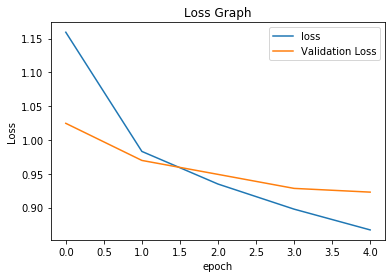

In [19]:
#Loss graph from history object
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss','Validation Loss'], loc='upper right')
plt.show()

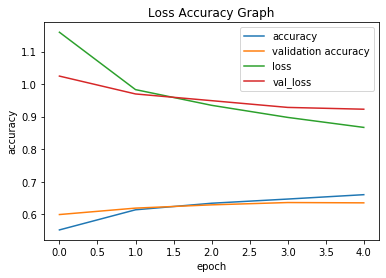

In [20]:
#Accuracy Loss Graph from history object
plt.plot(accuracy_val.history['accuracy'])
plt.plot(accuracy_val.history['val_accuracy'])
plt.plot(accuracy_val.history['loss'])
plt.plot(accuracy_val.history['val_loss'])
plt.title('Loss Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

## What techniques you can apply to fix overfitting model

https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [21]:
#Using Early Stopping to handle Overfitting

from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(13734, embed_dim, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# In min mode, training will stop when the quantity monitored has stopped decreasing
#verbosity mode

accuracy_val_early_stop = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test), callbacks=[es])

Epoch 1/5
229/229 [==============================] - 51s 221ms/step - loss: 1.1646 - accuracy: 0.5484 - val_loss: 1.0318 - val_accuracy: 0.5993
Epoch 2/5
229/229 [==============================] - 49s 215ms/step - loss: 0.9892 - accuracy: 0.6100 - val_loss: 0.9794 - val_accuracy: 0.6163
Epoch 3/5
229/229 [==============================] - 50s 219ms/step - loss: 0.9428 - accuracy: 0.6287 - val_loss: 0.9481 - val_accuracy: 0.6263
Epoch 4/5
229/229 [==============================] - 46s 201ms/step - loss: 0.9056 - accuracy: 0.6445 - val_loss: 0.9330 - val_accuracy: 0.6295
Epoch 5/5
229/229 [==============================] - 49s 214ms/step - loss: 0.8750 - accuracy: 0.6554 - val_loss: 0.9225 - val_accuracy: 0.6339


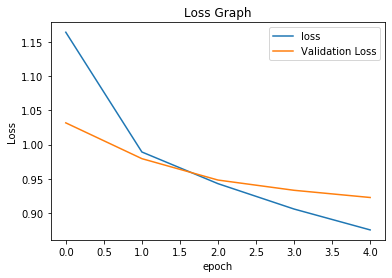

In [22]:
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss','Validation Loss'], loc='upper right')
plt.show()

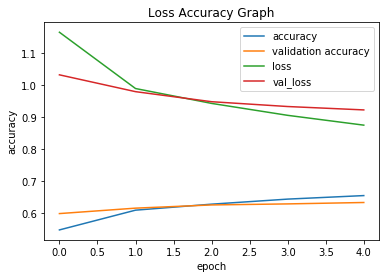

In [23]:
plt.plot(accuracy_val_early_stop.history['accuracy'])
plt.plot(accuracy_val_early_stop.history['val_accuracy'])
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [24]:
#Using Early Stopping to handle Overfitting

from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(13734, embed_dim, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='max', verbose=1)
# in "max" mode it will stop when the quantity monitored has stopped increasing
#verbosity mode

accuracy_val_early_stop = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test), callbacks=[es])

Epoch 1/5
229/229 [==============================] - 51s 223ms/step - loss: 1.1637 - accuracy: 0.5498 - val_loss: 1.0268 - val_accuracy: 0.5987
Epoch 2/5
229/229 [==============================] - 50s 218ms/step - loss: 0.9848 - accuracy: 0.6129 - val_loss: 0.9733 - val_accuracy: 0.6165
Epoch 00002: early stopping


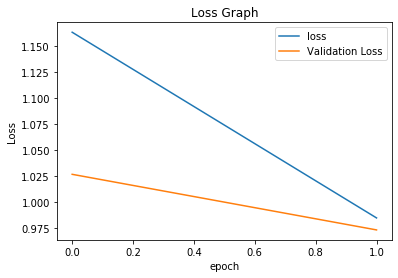

In [25]:
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss','Validation Loss'], loc='upper right')
plt.show()

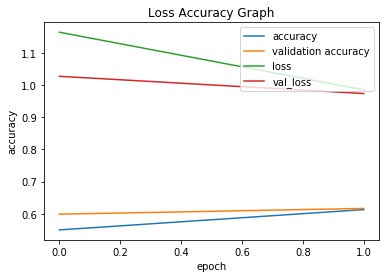

In [26]:
plt.plot(accuracy_val_early_stop.history['accuracy'])
plt.plot(accuracy_val_early_stop.history['val_accuracy'])
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [27]:
#Using Early Stopping to handle Overfitting

from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(13734, embed_dim, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# In min mode, training will stop when the quantity monitored has stopped decreasing
#verbosity mode

accuracy_val_early_stop = model.fit(X_train, y_train, epochs=15, batch_size=512, validation_data=(X_test,y_test), callbacks=[es])

Epoch 1/15
229/229 [==============================] - 49s 215ms/step - loss: 1.1602 - accuracy: 0.5503 - val_loss: 1.0293 - val_accuracy: 0.5996
Epoch 2/15
229/229 [==============================] - 50s 219ms/step - loss: 0.9834 - accuracy: 0.6133 - val_loss: 0.9802 - val_accuracy: 0.6149
Epoch 3/15
229/229 [==============================] - 54s 234ms/step - loss: 0.9369 - accuracy: 0.6323 - val_loss: 0.9451 - val_accuracy: 0.6280
Epoch 4/15
229/229 [==============================] - 54s 235ms/step - loss: 0.9005 - accuracy: 0.6468 - val_loss: 0.9336 - val_accuracy: 0.6330
Epoch 5/15
229/229 [==============================] - 47s 207ms/step - loss: 0.8699 - accuracy: 0.6585 - val_loss: 0.9253 - val_accuracy: 0.6346
Epoch 6/15
229/229 [==============================] - 48s 212ms/step - loss: 0.8454 - accuracy: 0.6676 - val_loss: 0.9166 - val_accuracy: 0.6380
Epoch 7/15
229/229 [==============================] - 48s 211ms/step - loss: 0.8264 - accuracy: 0.6756 - val_loss: 0.9133 - val_ac

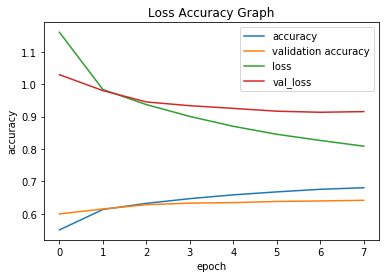

In [28]:
plt.plot(accuracy_val_early_stop.history['accuracy'])
plt.plot(accuracy_val_early_stop.history['val_accuracy'])
plt.plot(accuracy_val_early_stop.history['loss'])
plt.plot(accuracy_val_early_stop.history['val_loss'])
plt.title('Loss Accuracy Graph')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','val_loss'], loc='upper right')
plt.show()